## In-class practice for Lecture 20

* 3-D line plots use plot3d
* 3-D surface plots use plot_surface
* vector plots using quiver
* Simple modeling uisng NumPy and Matplotlib
* Answer each question using Python codes in a separate cell. send it to binzh@hku.hk right after class (whether you've got it done or not)

### 1. Parker sprial inpolar geometry

- also import numpy and matplotlib.pyplot
- use the np.linspace() function create a 1-D numpy array named "theta", contains 100 data points between 0 and $5\pi$
- generate another 1-D Numpy array named "r" based on the sprial function $r=\frac{1}{2}\theta$
- use plt.polar(theta,r) to show the sprial

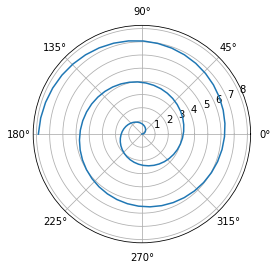

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,np.pi*5,100)
r = theta*0.5
plt.polar(theta,r)

### 2.  Generate 3-D line plots using plot3D

- import the mplot3d module using "**from mpl_toolkits import mplot3d**"
- create a 3-D axes object using "**ax = plt.axes(projection='3d')**"
- use np.linspace to create a 1-D NumPy array named $z$, contains 1000 data points between -50.0 and 100.0
- compute two variables: $x=\cos(z)$ and $y=\sin(z)$
- use the plot3D function to visualize the line formed by $(x,y,z)$: **ax.plot3D(x,y,z)**
- generate another 3-D line plot with the same $z$, but $x=z\cos(z)$ and $y=z\sin(z)$

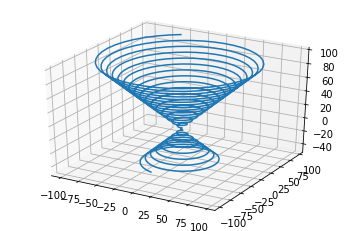

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-50, 100, 1000)
xline = zline*np.sin(zline)
yline = zline*np.cos(zline)
ax.plot3D(xline, yline, zline)

### 3. Generate 3-D spheres using plot_surface()

- create a figure handle using fig = plt.figure(), set the size of the figure to be, say (8,8)
- create a 3-D axes object using "**ax = plt.axes(projection='3d')**" as you did in the first problem
- create a 1-D numpy array $u$, ranging between 0 and $2\pi$, with 100 points (this is basically the azimuthal direction - longitude) 
- create a 1-D numpy array $v$, ranging between 0 and $\pi$, with 100 points (this is the meridional direction - latitude)
- now generate a 2-D grid ($U$,$V$) using $u$ and $v$ through np.meshgrid(u,v)
- now compute the Cartesian coordinates (x,y,z) for a sphere based on the 2-D mesh (U,V) using the following equations (with $R=8$):
$$x = R \cos U\sin V$$
$$y = R\sin U\sin V$$
$$z = R \cos V$$
- plot the surface formed by (x,y,z) using **ax.plot_surface(x, y, z)**
- add labels and colorbars to your plot (choose your favorite colormap - does it matter?)

Now let's learn how to **color your sphere** with some data
- first import the module LightSource using: **from matplotlib.colors import LightSource**
- then create a LightSource object named **ls** using: **ls = LightSource()**
- next compute a new NumPy array named **data** through the following equation, which is the data we'd like to visualize on the sphere  you've created:
$$data = \sin(V)\sin(z) $$
- next create a shade object which contains the color information (an rgb array): **rgb = ls.shade(data, plt.cm.jet)**, here _plt.cm.jet_ sets the colormap to be "jet", feel free to replace "jet" with your favorite ones.
- now, use the same function **plot_surface()** to visualize the same sphere formed by (x,y,z) arrays you've calculated, but add one more keyword in the function: "facecolors=rgb". 
- Done! Now what does your new sphere look like?

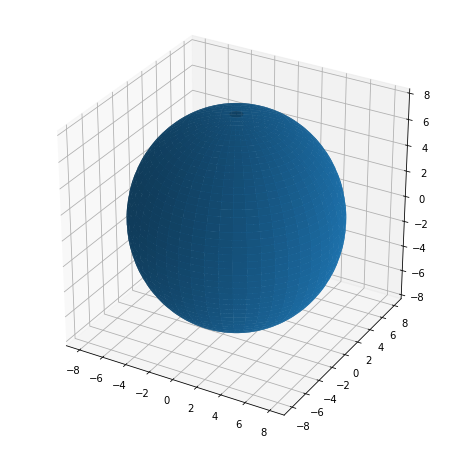

In [3]:
from matplotlib.colors import LightSource

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

U,V=np.meshgrid(u,v)
R=8
#x = R * np.outer(np.cos(u), np.sin(v))
#y = R * np.outer(np.sin(u), np.sin(v))
#z = R * np.outer(np.ones(np.size(u)), np.cos(v))

x = R * np.cos(U)*np.sin(V)
y = R * np.sin(U)*np.sin(V)
z = R * np.cos(V)

# Plot the surface
surf = ax.plot_surface(x, y, z)

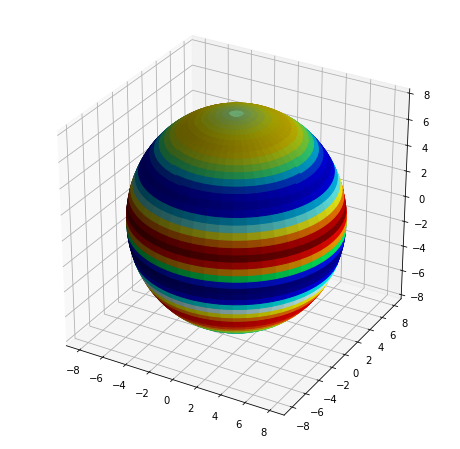

In [7]:
from matplotlib.colors import LightSource

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

U,V=np.meshgrid(u,v)

R=8

x = R * np.cos(U)*np.sin(V)
y = R * np.sin(U)*np.sin(V)
z = R * np.cos(V)

ls = LightSource()
# shade data, creating an rgb array.
data = np.sin(V)*np.sin(z)
rgb = ls.shade(data, plt.cm.jet)
#surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,antialiased=False, facecolors=rgb)
surf = ax.plot_surface(x, y, z, facecolors=rgb)

### 4. Direction of a dipole magnetic field

In a 2-D Cartesian plane, the x and y component of a dipole magnetic vector is written as:

$$B_x = -B_E\frac{3xy}{r^5}$$
$$B_y = -B_E\frac{3y^2-r^2}{r^5}$$

where $B_E=31000$ nT and $r=\sqrt{x^2+y^2}$ is the distance from the origin. Let's make a vector plot and a stream plot to see what the dipole magnetic field looks like.

- use np.linspace() to create a 1-D numpy array named x, between -40 and 20, with 50 grid points
- use np.linspace() to create a 1-D numpy array named y, between -15 and 15, with 25 grid points
- now generate a 2-D grid (X,Y) using np.meshgrid() based on the two 1-D numpy arrays x and y you have created
- compute the Bx and By components as a function of the 2-D grid X and Y using the dipole equeation given above
- we're only interested in the outer region of the dipole field, so set Bx, By to be "nan" inside $r<1$. [hint: remember the relational operation together with index slicing, something like Bx[r<1]=nan]
- now you've got a 2-D grid (X,Y) and the corresponding components of vector (Bx, By) on the same grid, try **plt.streamplot(X,Y,Bx,By,density=2.0, linewidth=1.0)** to visualize the dipole vector, aka magnetic field lines!
- now try to add some solar wind magnetic field to it, a typical solar wind magnetic field vector is $bx_{sw} = 5$, $by_{sw} = 10$. try visualize the topology of magnetic field lines with the total magnetic vector (Bx+$bx_{sw}$, By+$by_{sw}$) using the plt.streamplot() function. what does the new plot look like? - you've just created a "magnetosphere"! 
- then try use the plt.quiver() function to visualize the direction of the magnetic field vectors. How's your plot look like? How to improve it?

(-43.0, 23.0, -16.5, 16.5)

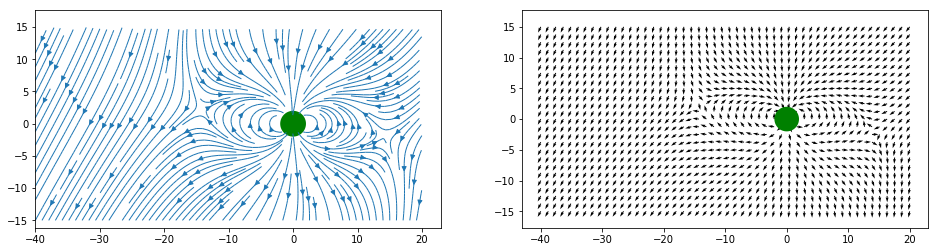

In [8]:
x0 = np.linspace(-40,20,50)
y0 = np.linspace(-15,15,25)
x,z=np.meshgrid(x0,y0)

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
theta = np.linspace(0,np.pi*2,100)
xx = 2*np.cos(theta)
yy = 2*np.sin(theta)
plt.fill(xx,yy,'g')

r=np.sqrt(x**2+z**2)
bx = -31000*3*x*z/r**5 - 5
bz = -31000*(3*z**2-r**2)/r**5 - 10
bx[r<1]=np.nan
bz[r<1]=np.nan
b = np.sqrt(bx**2+bz**2)

plt.streamplot(x,z,bx,bz,density=2,linewidth=1.0)
plt.axis('equal')

plt.subplot(1,2,2)

plt.fill(xx,yy,'g')
plt.quiver(x,z,bx/b,bz/b)
plt.axis('equal')